In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

<h4 align='Left'>Data Merging</h4>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Required data saved into a single file
data=pd.read_csv('C:\\Users\\Shreya choudhary\\tabl1.txt',names=["ID","mag_i","vartype"])
data1=pd.read_csv('C:\\Users\\Shreya choudhary\\tabl2.txt', sep=",",header=None ,names=["ID","Mag","MJD"])
#result = pd.merge(data, data1, on='ID',how='left')
result = data[['ID','vartype']].merge(data1[['ID','Mag','MJD']], on = 'ID',how = 'left')
#result.drop(result.index[[1]])
result.to_csv('mergex.txt', encoding='utf-8',index=False,header=None)
print(result)
#header=none..removes the name of columns from txt file
#index=true..writes row names in txt file

   ID  vartype  Mag  MJD
0  12        1   15   12
1  12        1   13   12
2  12        1   14   15
3  34        1    2    7
4  34        1    4    5
5  45        2    2    2


<h3 align='Left'>dmdt mapping</h3>

In [3]:
ID,vartype,MJD,Mag=np.loadtxt('mergex1.txt', unpack=True, delimiter=',') 

#Finding out dm, dt values and hence dmdt pairs
c=[]
e=[]
for i in range(0,len(Mag)):
    for j in range(i+1,len(Mag)):
        c.append(Mag[i]-Mag[j])
#print(c)   
for i in range(0,len(MJD)):
    for j in range(i+1,len(MJD)):
        e.append(MJD[j]-MJD[i])
#print(e)
s1 = pd.Series(c, name='dm_y')

s2 = pd.Series(e,name='dt_x')



#Assigning bins to all dmdt values

bins=[-8,-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.5,1,1.5,2,2.5,3,5,8]
bins1=[1/145,2/145,3/145,4/145,1/25,2/25,3/25,1.5,2.5,3.5,4.5,5.5,7,10,20,30,60,90,120,240,600,960,2000,4000] #bins of x axis
return_bins_of_s2= np.digitize(s2, bins1) # np.digitize gives the bin number to which a particular value of dm, dt belongs to.
return_bins_of_s1 = np.digitize(s1, bins)
ybins = pd.Series(return_bins_of_s1, name='ybin')
xbins = pd.Series(return_bins_of_s2, name='xbin')

dmdt=pd.concat([s1, s2,ybins,xbins], axis=1)
dmdt.to_csv('checkxbins.txt',encoding='utf-8')
print(dmdt)


# exclude all the values from dataframe dmdt that are outside the bin boundries i.e. bin number 0, 23 and 24
dmdt=dmdt[dmdt.ybin != 23]
dmdt=dmdt[dmdt.xbin != 0]
dmdt=dmdt[dmdt.ybin != 0]
dmdt=dmdt[dmdt.xbin != 24]


dmdt['bins_xaxis']=pd.cut(dmdt['dt_x'],bins1) #pd.cut gives range of bin for all dt_x values 
dmdt['bins_yaxis']=pd.cut(dmdt['dm_y'],bins)


dmdt['merged_dmdt']=  dmdt.dm_y.map(str) + ',' + dmdt.dt_x.map(str)
dmdt['dmdt_bin_number']=  dmdt.ybin.map(str) + ',' + dmdt.xbin.map(str)

dmdt.dropna() # drops all the values with NaN in dataframe dmdt
print(dmdt)
 


dmdtpairs=len(dmdt.dm_y) # number of dmdtpairs for a light curve of length n that falls under the given bin range
print(dmdtpairs)


#grouping and counting all the values that fall in all individual bins
df=dmdt.groupby('dmdt_bin_number',sort=False).merged_dmdt.agg(['count']) #counts how many merged_dmdt benlongs to each 'dmdt_bin_number' range
print(df)
df.to_csv('count1.txt',encoding='utf-8')

data_count=pd.read_csv('C:\\Users\\Shreya choudhary\\count1.txt')

ldf=dmdt.set_index('dmdt_bin_number').join(data_count.set_index('dmdt_bin_number'))

abcc=ldf.dropna()
final=abcc.drop_duplicates(['ybin','xbin']) # drops all the rows where both of values of ybin and xbin are duplicate
final1=final.drop(['bins_xaxis','bins_yaxis','merged_dmdt'],axis=1)
print(final1)
final1.to_csv('final_table11.txt',encoding='utf-8',header=None,index=False)





           dm_y       dt_x  ybin  xbin
0      0.014542   0.008945    12     1
1     -0.016017   0.990674    11     7
2     -0.630193   5.972722     7    12
3     -0.613941   5.979226     7    12
4     -0.567015   5.985683     7    12
5     -0.347741   5.992128     8    12
6     -0.008018  25.981051    11    15
7     -0.084815  25.988589    11    15
8     -0.272598  26.003615     9    15
9     -0.205569 -29.892032     9     0
10    -0.206483 -29.885588     9     0
11    -0.443275 -29.879135     8     0
12    -0.555396 -29.872682     7     0
13    -0.012284 -24.002258    11     0
14    -0.089507 -23.995383    11     0
15    -0.124857 -23.988603    10     0
16    -0.335772 -23.982044     8     0
17    -0.025664 -21.970300    11     0
18    -0.052967 -21.963155    11     0
19     0.011466 -21.956013    12     0
20    -0.134710 -21.948940    10     0
21     0.000806 -13.989196    12     0
22    -0.099252 -13.979890    11     0
23    -0.198635 -13.970579    10     0
24    -0.168841 -13.96194

                     dm_y         dt_x  ybin  xbin  count
dmdt_bin_number                                          
10,1            -0.112573     0.013654    10     1     24
10,11           -0.128095     4.923757    10    11      3
10,12           -0.130203     5.909989    10    12     10
10,13           -0.172971     7.999721    10    13     20
10,14           -0.132076    10.031430    10    14     27
10,15           -0.139535    20.027417    10    15     16
10,16           -0.191227    57.990318    10    16     30
10,17           -0.127384    60.015401    10    17     17
10,18           -0.129748    92.886728    10    18     26
10,19           -0.165512   158.294506    10    19     57
10,2            -0.187783     0.015026    10     2      9
10,20           -0.102144   350.945913    10    20    425
10,21           -0.173312   743.999537    10    21    436
10,22           -0.119526  1069.980883    10    22    756
10,23           -0.171598  2120.073103    10    23    438
10,3          

In [1]:
import os, numpy, PIL
from PIL import Image

# Access all PNG files in directory
allfiles=os.listdir("images_sv6")
imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]
N=len(imlist)
print(N)
im = Image.open('Var6_fig0.png')
w,h = im.size
# Alternative method using PIL blend function
def average_img_1(imlist):
    # Assuming all images are the same size, get dimensions of first image
    w,h=Image.open(imlist[0]).size
    N=len(imlist)

    # Create a numpy array of floats to store the average (assume RGB images)
    arr=np.zeros((h,w),np.float)

    # Build up average pixel intensities, casting each image as an array of floats
    for im in imlist:
        imarr=np.array(Image.open(im),dtype=np.float)
        arr=arr+imarr/N
    out = Image.fromarray(arr)
    return out

def average_img_2(imlist):
    # Alternative method using PIL blend function
    N = len(imlist)
    avg=Image.open(imlist[0])
    for i in xrange(1,N):
        img=Image.open(imlist[i])
        avg=Image.blend(avg,img,1.0/float(i+1))
    return avg

def average_img_3(imlist):
    # Alternative method using numpy mean function
    images = np.array([np.array(Image.open(fname)) for fname in imlist])
    arr = np.array(np.mean(images, axis=(0)), dtype=np.uint8)
    out = Image.fromarray(arr)
    return out
    

500


432 288


In [6]:
import os, numpy, PIL
from PIL import Image

# Access all PNG files in directory
allfiles=("images_sv6")
imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]
N=len(imlist)
print(N)
# Assuming all images are the same size, get dimensions of first image
#with Image.open(imlist[0]) as img:
 #   w,h = img.size

#img = Image.open(imlist[0])

#width, height = img.size

w,h=Image.open("Var6_fig0").size
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()

0


FileNotFoundError: [Errno 2] No such file or directory: 'Var6_fig0'


<h1 align='Left'>Heat Map</h1>

In [4]:
dm,dt,xbin,ybin,count=np.loadtxt('final_table11.txt',unpack=True,delimiter=',',dtype=int)

# assignig intensity values to each bin. Bins are in the form of 23x24 numpy array

aa = np.zeros(shape=(22,23))
for gg in range(0,len(xbin)):
                    
    l1=xbin[gg]
    m1=ybin[gg]
    o1=count[gg]
    i1=(255 * o1)/(dmdtpairs + 0.99999)
    print(i1)
    aa[l1-1,m1-1]=i1
            
print (aa)        
        
        
#df2 = pd.DataFrame(data,dtype=float)
#print(df2)


0.2650383267355413
0.03312979084194266
0.11043263613980886
0.22086527227961772
0.2981681175774839
0.17669221782369418
0.3312979084194266
0.18773548143767504
0.287124853963503
0.6294660259969105
0.09938937252582797
4.693387035941877
4.8148629356956665
8.34870729216955
4.836949462923628
0.044173054455923545
0.011043263613980886
0.011043263613980886
0.3754709628753501
0.06625958168388532
0.08834610891184709
0.12147589975378974
0.3975574901033119
0.386514226489331
0.3975574901033119
0.44173054455923544
0.3202546448054457
1.0049369888722606
0.1546056905957324
6.868909967896111
7.144991558245633
12.666623365236076
6.327790050811047
0.022086527227961773
0.05521631806990443
0.044173054455923545
0.3202546448054457
0.044173054455923545
0.17669221782369418
0.11043263613980886
0.48590359901515895
0.36442769926136925
0.287124853963503
0.5963362351549678
0.35338443564738836
1.1374561522400313
0.1435624269817515
7.11186176740369
6.913083022352034
14.897362615260215
7.387943357753213
0.033129790841942

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(aa)
data=[trace]
py.iplot(data, filename='basic-heatmap')

ModuleNotFoundError: No module named 'plotly'

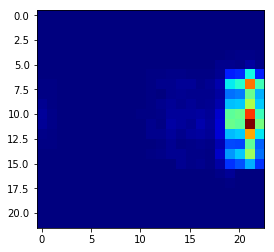

In [8]:
import matplotlib.pyplot as plt
import numpy as np


plt.imshow(aa,cmap='jet')
plt.show()

<h2 align='Left'>Heat Map Plot</h2>

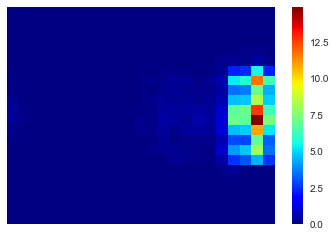

In [10]:
import seaborn as sns
sns.set()
image11=sns.heatmap(aa,xticklabels=False, yticklabels=False,cmap='jet')
#image11=sns.heatmap(aa,cbar=False,xticklabels=False, yticklabels=False)
#vmin=0, vmax=255,
#cmap='RdYlBu'// colormap of heatmap
#sns_plot.figure.savefig("output.png")
image11.figure.savefig("output_image1.png")